<a href="https://colab.research.google.com/github/aaryamanz/Quantitative-Trading-Strategy-with-Backtesting-and-Risk-Management/blob/main/Quantitative_Trading_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing the required librarires

In [ ]:
!pip install yfinance
!pip install pandas numpy matplotlib seaborn
!pip install backtrader
!pip install ta


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.5/419.5 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=cb857e2c65b11fbd3cca244c8cfebe4370302b6f11a0ecf5df78e6d9c3f6c838
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


yfinance: For downloading historical stock data.

pandas, numpy: For data manipulation.

matplotlib, seaborn: For plotting and visualizations.

scikit-learn: For machine learning models.

statsmodels: For statistical analysis.

backtrader: For backtesting trading strategies.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import backtrader as bt

In [ ]:
# Download historical data for THE stock NVIDIA
ticker = 'NVDA'
data = yf.download(ticker, start='2020-01-01', end='2024-08-01')

data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,5.96875,5.99775,5.91800,5.99775,5.973121,237536000
2020-01-03,5.87750,5.94575,5.85250,5.90175,5.877517,205384000
2020-01-06,5.80800,5.93175,5.78175,5.92650,5.902165,262636000
2020-01-07,5.95500,6.04425,5.90975,5.99825,5.973620,314856000
2020-01-08,5.99400,6.05100,5.95375,6.00950,5.984824,277108000


Visualize the price movement and some technical indicators.

The indicators we used were,

### **1. On-Balance Volume (OBV):**
- **Tracks volume flow** to predict price movements. Rising OBV indicates buying pressure; falling OBV suggests selling pressure.

### **2. Accumulation/Distribution (A/D) Line:**
- **Volume-based indicator** that tracks the flow of money in and out of a stock. Rising A/D line indicates buying pressure; falling A/D line suggests selling pressure.

### **3. Moving Average Convergence Divergence (MACD):**
- **Trend-following** indicator that shows the relationship between two moving averages. Crossovers signal buy/sell opportunities.

### **4. Relative Strength Index (RSI):**
- **Momentum oscillator** ranging from 0-100. Values above 70 indicate overbought, below 30 suggest oversold conditions.

### **5. Average Directional Index (ADX):**
- **Trend strength indicator**. Values above 25 indicate a strong trend; below 20 suggest weak or no trend.

### **6. Aroon Oscillator:**
- **Measures trend direction** and strength. Positive values suggest uptrend; negative values indicate downtrend.

### **7. Stochastic Oscillator:**
- **Momentum indicator** that shows overbought/oversold conditions. Above 80 is overbought, below 20 is oversold.

In [ ]:
%matplotlib inline


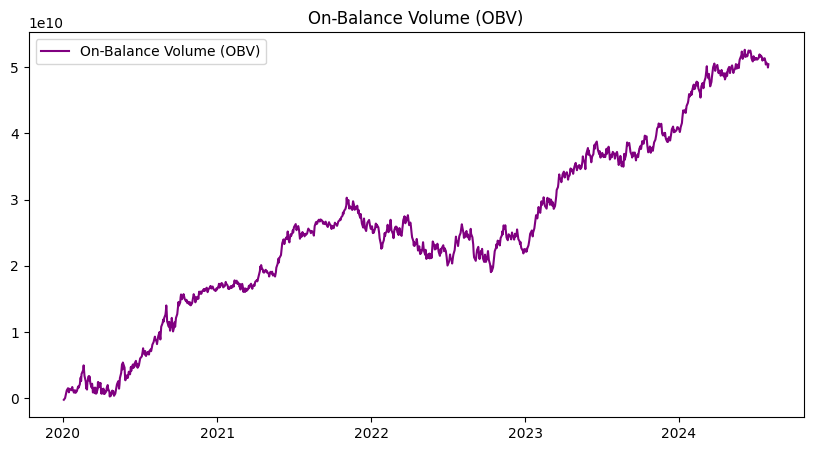

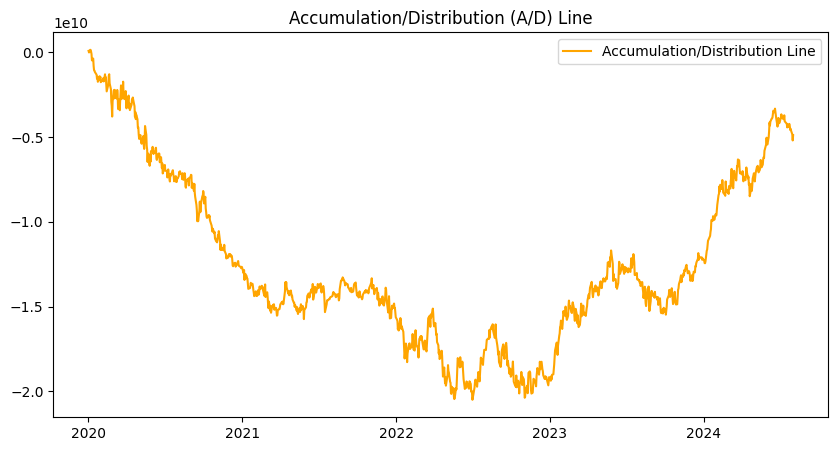

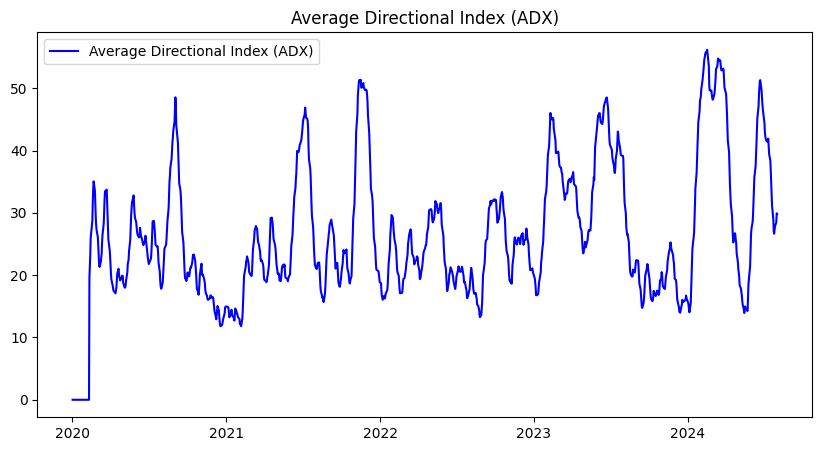

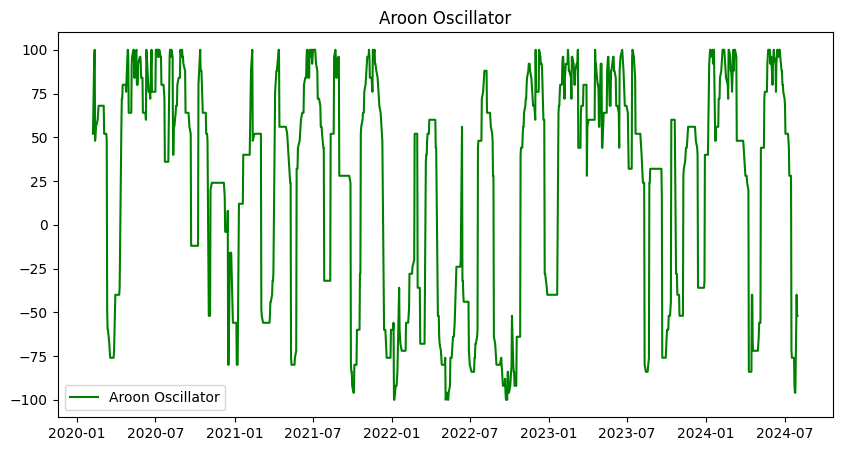

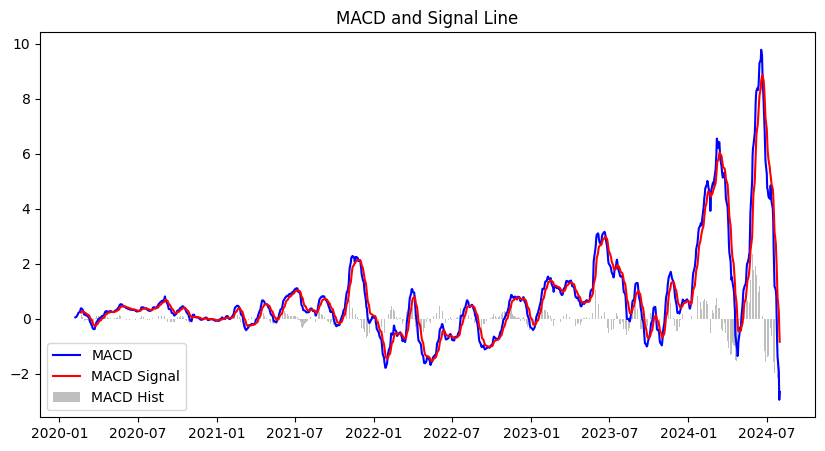

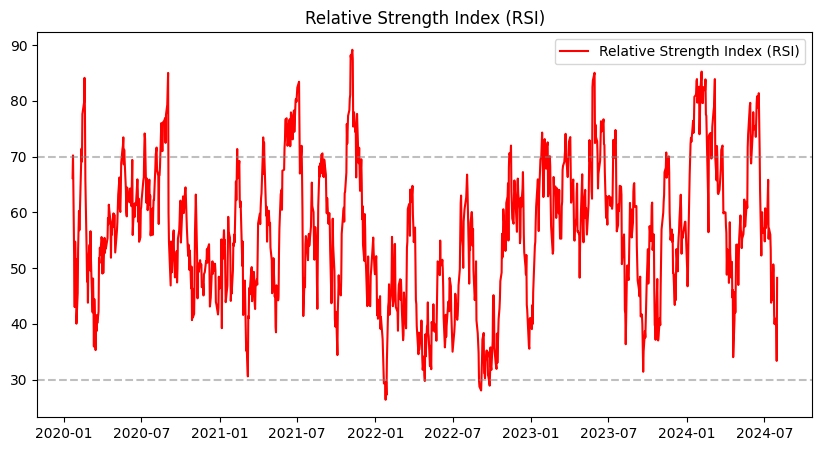

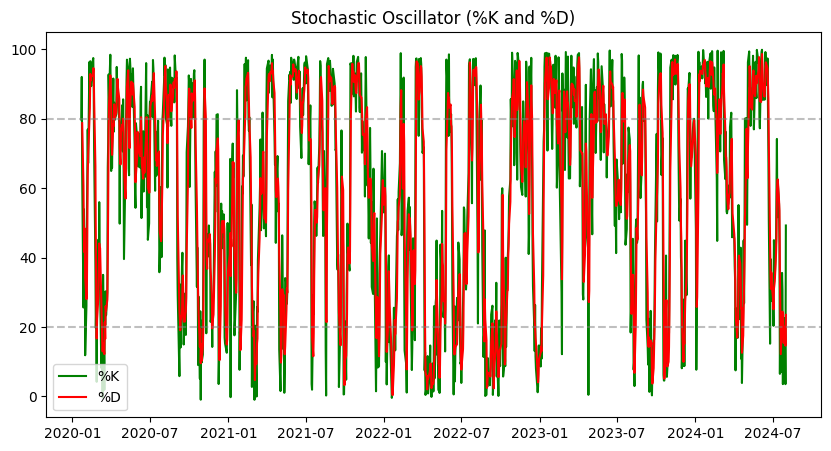

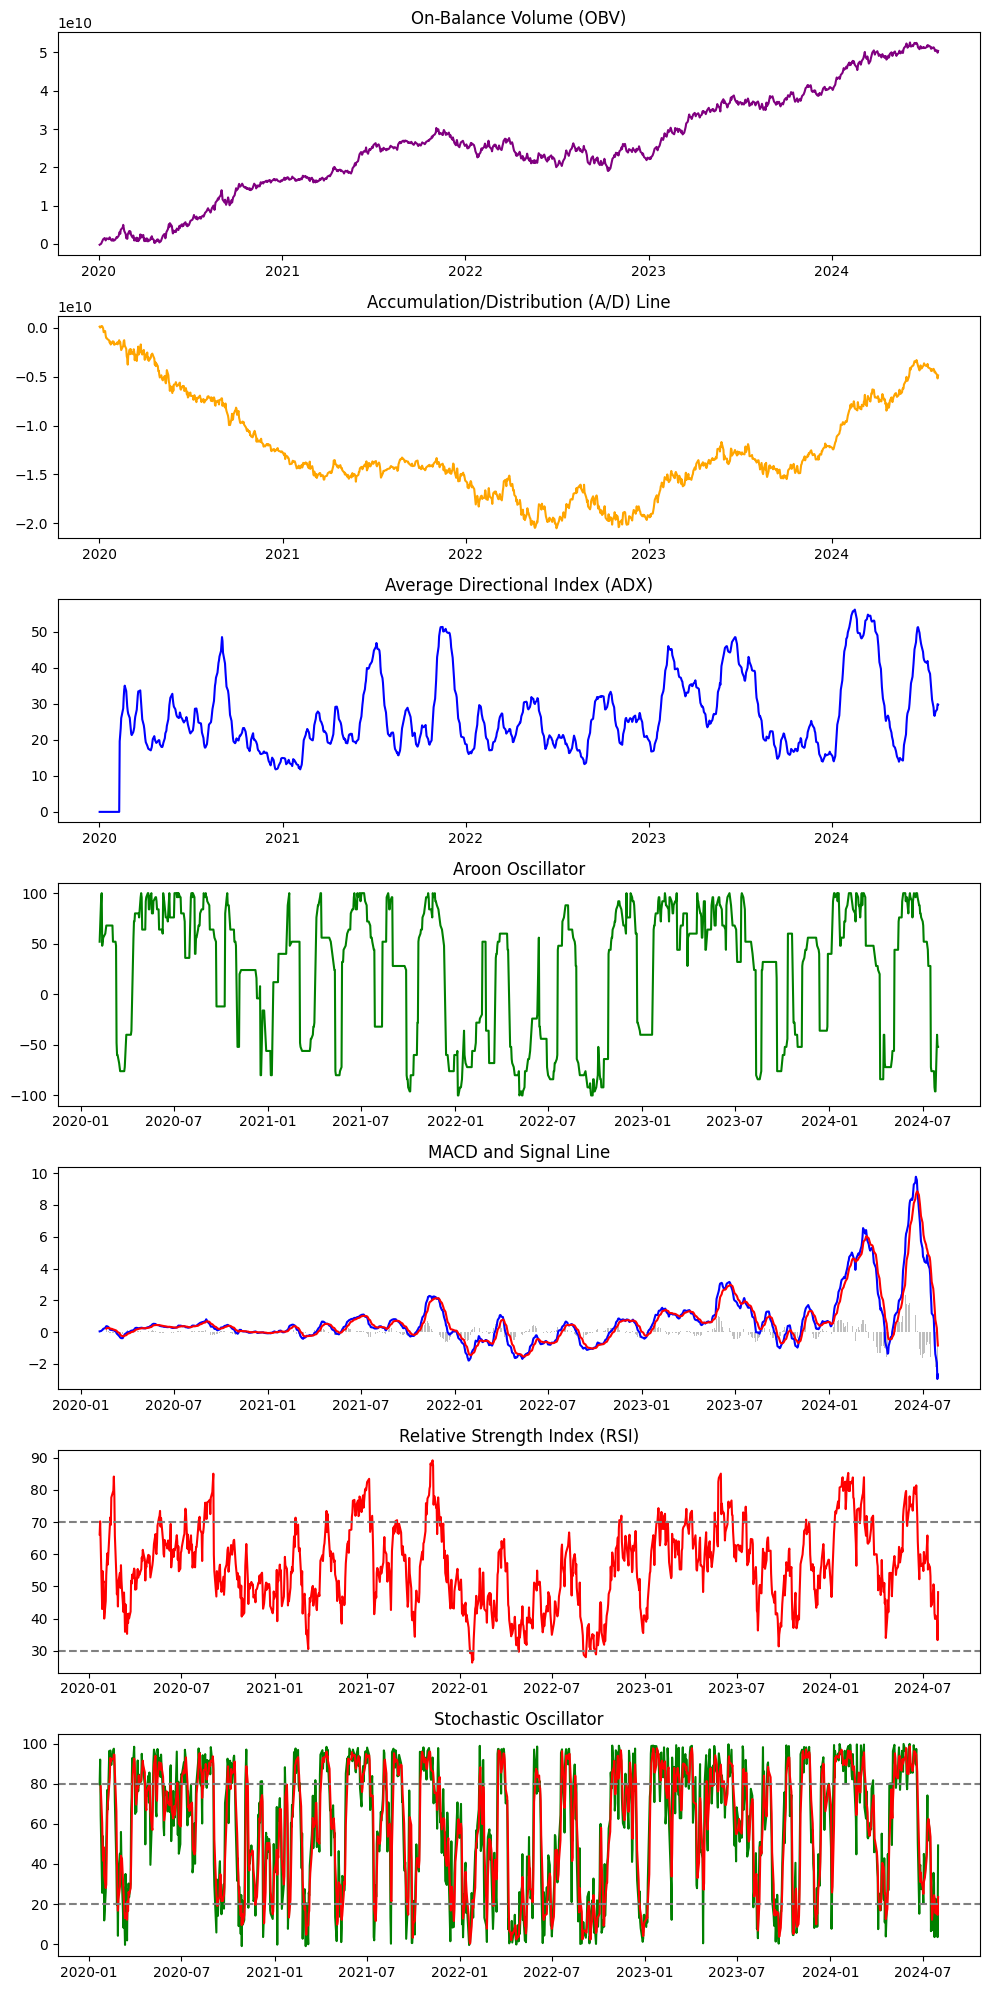

In [ ]:
import matplotlib.pyplot as plt

# OBV Calculation
data['OBV'] = (np.sign(data['Adj Close'].diff()) * data['Volume']).cumsum()

# Plot OBV
plt.figure(figsize=(10, 5))
plt.plot(data['OBV'], label='On-Balance Volume (OBV)', color='purple')
plt.title('On-Balance Volume (OBV)')
plt.legend()
plt.show()

# A/D Line Calculation
clv = ((data['Adj Close'] - data['Low']) - (data['High'] - data['Adj Close'])) / (data['High'] - data['Low'])
data['AD Line'] = (clv * data['Volume']).cumsum()

# Plot A/D Line
plt.figure(figsize=(10, 5))
plt.plot(data['AD Line'], label='Accumulation/Distribution Line', color='orange')
plt.title('Accumulation/Distribution (A/D) Line')
plt.legend()
plt.show()

import ta

# ADX Calculation using the ta library
data['ADX'] = ta.trend.ADXIndicator(high=data['High'], low=data['Low'], close=data['Adj Close'], window=14).adx()

# Plot ADX
plt.figure(figsize=(10, 5))
plt.plot(data['ADX'], label='Average Directional Index (ADX)', color='blue')
plt.title('Average Directional Index (ADX)')
plt.legend()
plt.show()

# Aroon Indicator Calculation
aroon_indicator = ta.trend.AroonIndicator(high=data['High'], low=data['Low'], window=25)

# Aroon Up and Aroon Down
data['Aroon Up'] = aroon_indicator.aroon_up()
data['Aroon Down'] = aroon_indicator.aroon_down()
data['Aroon Oscillator'] = data['Aroon Up'] - data['Aroon Down']

# Plot Aroon Oscillator
plt.figure(figsize=(10, 5))
plt.plot(data['Aroon Oscillator'], label='Aroon Oscillator', color='green')
plt.title('Aroon Oscillator')
plt.legend()
plt.show()

# MACD Calculation
data['MACD'], data['MACD Signal'], data['MACD Hist'] = ta.trend.MACD(close=data['Adj Close']).macd(), ta.trend.MACD(close=data['Adj Close']).macd_signal(), ta.trend.MACD(close=data['Adj Close']).macd_diff()

# Plot MACD
plt.figure(figsize=(10, 5))
plt.plot(data['MACD'], label='MACD', color='blue')
plt.plot(data['MACD Signal'], label='MACD Signal', color='red')
plt.bar(data.index, data['MACD Hist'], label='MACD Hist', color='gray', alpha=0.5)
plt.title('MACD and Signal Line')
plt.legend()
plt.show()

# RSI Calculation
data['RSI'] = ta.momentum.RSIIndicator(close=data['Adj Close'], window=14).rsi()

# Plot RSI
plt.figure(figsize=(10, 5))
plt.plot(data['RSI'], label='Relative Strength Index (RSI)', color='red')
plt.axhline(70, linestyle='--', alpha=0.5, color='gray')
plt.axhline(30, linestyle='--', alpha=0.5, color='gray')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.show()

# Stochastic Oscillator Calculation
stoch = ta.momentum.StochasticOscillator(high=data['High'], low=data['Low'], close=data['Adj Close'], window=14, smooth_window=3)
data['Stoch %K'] = stoch.stoch()
data['Stoch %D'] = stoch.stoch_signal()

# Plot Stochastic Oscillator
plt.figure(figsize=(10, 5))
plt.plot(data['Stoch %K'], label='%K', color='green')
plt.plot(data['Stoch %D'], label='%D', color='red')
plt.axhline(80, linestyle='--', alpha=0.5, color='gray')
plt.axhline(20, linestyle='--', alpha=0.5, color='gray')
plt.title('Stochastic Oscillator (%K and %D)')
plt.legend()
plt.show()

# Subplot of all indicators
fig, axs = plt.subplots(7, figsize=(10, 20))

# OBV
axs[0].plot(data['OBV'], color='purple')
axs[0].set_title('On-Balance Volume (OBV)')

# A/D Line
axs[1].plot(data['AD Line'], color='orange')
axs[1].set_title('Accumulation/Distribution (A/D) Line')

# ADX
axs[2].plot(data['ADX'], color='blue')
axs[2].set_title('Average Directional Index (ADX)')

# Aroon Oscillator
axs[3].plot(data['Aroon Oscillator'], color='green')
axs[3].set_title('Aroon Oscillator')

# MACD
axs[4].plot(data['MACD'], color='blue')
axs[4].plot(data['MACD Signal'], color='red')
axs[4].bar(data.index, data['MACD Hist'], color='gray', alpha=0.5)
axs[4].set_title('MACD and Signal Line')

# RSI
axs[5].plot(data['RSI'], color='red')
axs[5].axhline(70, linestyle='--', color='gray')
axs[5].axhline(30, linestyle='--', color='gray')
axs[5].set_title('Relative Strength Index (RSI)')

# Stochastic Oscillator
axs[6].plot(data['Stoch %K'], color='green')
axs[6].plot(data['Stoch %D'], color='red')
axs[6].axhline(80, linestyle='--', color='gray')
axs[6].axhline(20, linestyle='--', color='gray')
axs[6].set_title('Stochastic Oscillator')

plt.tight_layout()
plt.show()


First, we need to calculate the 50-day and 200-day SMAs if they aren't already computed.

In [ ]:
# Calculate 50-day and 200-day Simple Moving Averages (SMA)
data['SMA50'] = data['Adj Close'].rolling(window=50).mean()
data['SMA200'] = data['Adj Close'].rolling(window=200).mean()

Calculate Average True Range (ATR)
ATR measures market volatility. We'll calculate it using the ta library.

In [ ]:
# Calculate Average True Range (ATR)
atr = ta.volatility.AverageTrueRange(high=data['High'], low=data['Low'], close=data['Adj Close'], window=14)
data['ATR'] = atr.average_true_range()

We'll generate signals when the SMA crossover occurs and the ATR is above its rolling mean (indicating higher volatility).

In [ ]:
# Calculate the rolling mean of ATR for the volatility threshold
data['ATR_Mean'] = data['ATR'].rolling(window=14).mean()

# Create a 'Signal' column
data['Signal'] = 0

# Generate signals
data['Signal'] = np.where(
    (data['SMA50'] > data['SMA200']) & (data['ATR'] > data['ATR_Mean']), 1, 0
)
data['Signal'] = np.where(
    (data['SMA50'] < data['SMA200']) & (data['ATR'] > data['ATR_Mean']), -1, data['Signal']
)

# Create 'Position' column to indicate when to enter or exit trades
data['Position'] = data['Signal'].diff()



Buy Signal (Signal = 1): When SMA50 crosses above SMA200 and ATR > ATR mean.
Sell Signal (Signal = -1): When SMA50 crosses below SMA200 and ATR > ATR mean.
Hold (Signal = 0): No action.


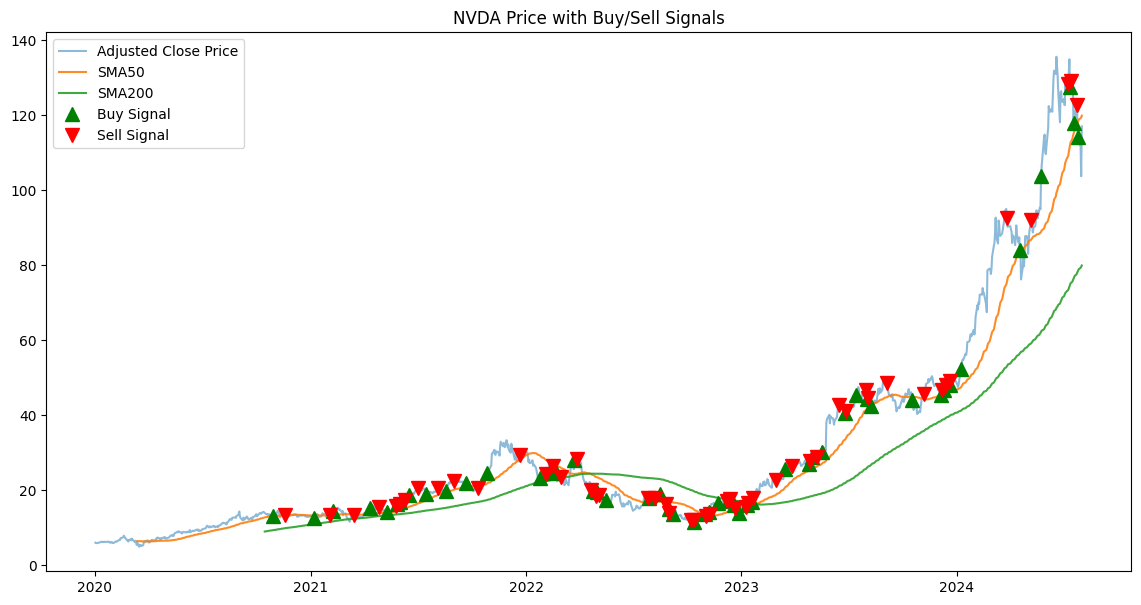

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(data['Adj Close'], label='Adjusted Close Price', alpha=0.5)
plt.plot(data['SMA50'], label='SMA50', alpha=0.9)
plt.plot(data['SMA200'], label='SMA200', alpha=0.9)

# Plot buy signals
plt.plot(data[data['Position'] == 1].index,
         data['Adj Close'][data['Position'] == 1],
         '^', markersize=10, color='g', label='Buy Signal')

# Plot sell signals
plt.plot(data[data['Position'] == -1].index,
         data['Adj Close'][data['Position'] == -1],
         'v', markersize=10, color='r', label='Sell Signal')

plt.title(f'{ticker} Price with Buy/Sell Signals')
plt.legend()
plt.show()


Backtest the Strategy Using Backtrader
We'll use Backtrader to simulate trading with our strategy over historical data.

In [ ]:
import backtrader as bt

class SMACrossATRStrategy(bt.Strategy):
    params = (
        ('sma_short_period', 50),
        ('sma_long_period', 200),
        ('atr_period', 14),
        ('atr_volatility_period', 14),
        ('atr_multiplier', 2),  # For stop-loss
    )

    def __init__(self):
        # Moving Averages
        self.sma_short = bt.indicators.SMA(self.data.close, period=self.params.sma_short_period)
        self.sma_long = bt.indicators.SMA(self.data.close, period=self.params.sma_long_period)

        # ATR for volatility filter and stop-loss
        self.atr = bt.indicators.ATR(self.data, period=self.params.atr_period)
        self.atr_mean = bt.indicators.SMA(self.atr, period=self.params.atr_volatility_period)

        # Crossover Signal
        self.crossover = bt.indicators.CrossOver(self.sma_short, self.sma_long)

        self.order = None  # To keep track of pending orders
        self.buyprice = None
        self.buycomm = None

    def next(self):
        if self.order:
            return  # Waiting for pending order

        if not self.position:
            # Buy condition
            if self.crossover > 0 and self.atr[0] > self.atr_mean[0]:
                # Calculate the size of the trade
                cash = self.broker.get_cash()
                size = int(cash / self.data.close[0] * 0.1)  # Invest 10% of available cash
                self.order = self.buy(size=size)
                # Set stop-loss price
                self.stop_price = self.data.close[0] - self.params.atr_multiplier * self.atr[0]
        else:
            # Sell condition
            if self.crossover < 0 and self.atr[0] > self.atr_mean[0]:
                self.order = self.sell(size=self.position.size)
            elif self.data.close[0] < self.stop_price:
                # Stop-loss triggered
                self.order = self.close()


Trading Logic:
Buy: When SMA50 crosses above SMA200 and ATR > ATR mean.
Sell: When SMA50 crosses below SMA200 and ATR > ATR mean.
Stop-loss: Close the position if price falls below the entry price minus ATR multiplier times ATR.


In [ ]:
# Prepare data for Backtrader
data_bt = bt.feeds.PandasData(dataname=data)

# Set up the backtesting environment
cerebro = bt.Cerebro()
cerebro.addstrategy(SMACrossATRStrategy)
cerebro.adddata(data_bt)
cerebro.broker.setcash(100000.0)  # Starting cash

# Add analyzers for performance metrics
cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name='sharpe')
cerebro.addanalyzer(bt.analyzers.DrawDown, _name='drawdown')
cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name='trade_analyzer')

# Run backtest
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
results = cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

# Extract and print analyzers
sharpe = results[0].analyzers.sharpe.get_analysis()
drawdown = results[0].analyzers.drawdown.get_analysis()
trade_analyzer = results[0].analyzers.trade_analyzer.get_analysis()

print('Sharpe Ratio:', sharpe.get('sharperatio'))
print('Max Drawdown:', drawdown.drawdown, '%')

# Plot the results
cerebro.plot()


Starting Portfolio Value: 100000.00
Final Portfolio Value: 150917.53
Sharpe Ratio: 0.675543798748802
Max Drawdown: 5.999770949405975 %


<IPython.core.display.Javascript object>

[[<Figure size 640x480 with 6 Axes>]]

Final Portfolio Value: Indicates total returns.
Sharpe Ratio: Measures risk-adjusted performance.
Max Drawdown: Shows the largest drop from peak to trough.